# Using Python for Research Homework: Week 4, Case Study 2

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset.

Student: Vitor Ferreira Lavor

In [2]:
import pandas as pd
import numpy as np

# File: bird_tracking.csv
birddata = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@bird_tracking.csv", index_col=0)
birddata.describe().T

,count,mean,std,min,25%,50%,75%,max
altitude,61920.0,52.313275,136.435498,-1010.000000,2.000000,14.000000,84.000000,6965.000000
device_info_serial,61920.0,849.328505,12.835870,833.000000,833.000000,851.000000,864.000000,864.000000
direction,61477.0,-4.610841,102.786009,-179.997929,-89.679759,-10.983115,81.964778,180.000000
latitude,61920.0,30.227762,14.809813,12.354424,15.393138,30.424481,49.999572,51.518452
longitude,61920.0,-8.953367,8.478471,-17.626145,-16.761302,-9.662089,2.603591,4.857561
speed_2d,61477.0,2.558987,3.576039,0.000000,0.410000,1.209049,3.059444,63.488066


### Exercise 1

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset. We will group the flight patterns by bird and date, and plot the mean altitude for these groupings.

`pandas` makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in the dataframe. In this exercise, we will group the dataframe by `birdname` and then find the average `speed_2d` for each bird.

#### Instructions 
- Fill in the code to find the mean altitudes of each bird using the pre-loaded `birddata` dataframe. 

In [8]:
# First, use `groupby()` to group the data by "bird_name".
grouped_birds = birddata.groupby("bird_name")

# Now calculate the mean of `speed_2d` using the `mean()` function.
mean_speeds = grouped_birds.mean()["speed_2d"]

# Find the mean `altitude` for each bird.
mean_altitudes = grouped_birds.mean()["altitude"]

### Exercise 2

In this exercise, we will group the flight times by date and calculate the mean altitude within that day.

#### Instructions 
- Convert `birddata.date_time` to the `pd.datetime` format, extract the date, and store it as `birddata["date"]`.
- Fill in the code to find the mean altitudes for each day.

What is the mean altitude of the birds on 2013-09-12? (Hint: You will need to convert this to a datetime object as well, extract the date, and then use this to index into the dataframe.)

In [9]:
# Convert birddata.date_time to the `pd.datetime` format.
birddata.date_time = pd.to_datetime(birddata.date_time)

# Create a new column of day of observation
birddata["date"] = birddata.date_time.dt.date

# Use `groupby()` to group the data by date.
grouped_bydates = birddata.groupby("date")

# Find the mean `altitude` for each date.
mean_altitudes_perday = grouped_bydates.altitude.mean()

### Exercise 3

In this exercise, we will group the flight times by both bird and date, and calculate the mean altitude for each.

#### Instructions 
- `birddata` already contains the `date` column. To find the average speed for each bird and day, create a new grouped dataframe called `grouped_birdday` that groups the data by both `bird_name` and date.

In [10]:
# Use `groupby()` to group the data by bird and date.
grouped_birdday = birddata.groupby(["bird_name", "date"])

# Find the mean `altitude` for each bird and date.
mean_altitudes_perday = grouped_birdday.altitude.mean()

### Exercise 4

Great! Now find the average speed for each bird and day.

#### Instructions 

- Store these are three `pandas` `Series` objects, one for each bird.
- Use the plotting code provided to plot the average speeds for each bird.

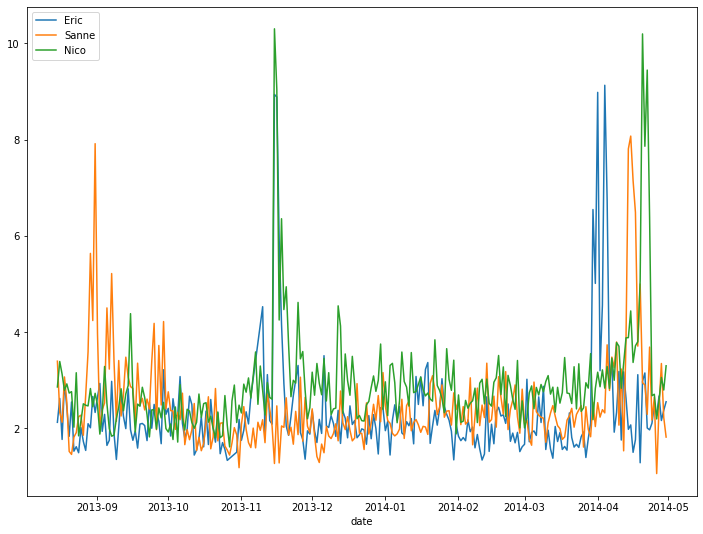

In [13]:
import matplotlib.pyplot as plt

eric_daily_speed  = pd.Series(grouped_birdday.speed_2d.mean()["Eric"])
sanne_daily_speed = pd.Series(grouped_birdday.speed_2d.mean()["Sanne"])
nico_daily_speed  = pd.Series(grouped_birdday.speed_2d.mean()["Nico"])

plt.figure(figsize=(12,9))
eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()